Importamos los archivos a manejar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos las librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

Leemos para facilidad de manipulación de datos, solo 200 filas.

In [ ]:
pathflights = './data/flights.csv'
pathflights = '/content/drive/MyDrive/Nequi/data/flights.csv'
flights_df = pd.read_csv(pathflights, nrows=200)

In [ ]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Verificamos tipos de datos, e identificamos que se pierden datos en el algunas columnas que están formateadas en tiempo HHMM

In [ ]:
flights_df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME           int64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

Despues de revisar, importamos las columnas necesarias para la ejecución, además en el tipo especifico requerido.

In [ ]:
dtype_flights = {"DEPARTURE_TIME" : str, 
                 "WHEELS_OFF": str,
                 "WHEELS_ON":str,
                 "ARRIVAL_TIME":str,
                 "SCHEDULED_ARRIVAL":str,
                 "SCHEDULED_DEPARTURE": str}
                #  ,
                #  "AIR_SYSTEM_DELAY": int,
                #  "SECURITY_DELAY": int,
                #  "AIRLINE_DELAY":int,
                #  "LATE_AIRCRAFT_DELAY":int}
                #  ,
                #  "WEATHER_DELAY" : int}
cols_to_use = ["YEAR", "MONTH", "DAY", "DAY_OF_WEEK", "AIRLINE", "TAIL_NUMBER", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "WHEELS_OFF", "DISTANCE", "WHEELS_ON", "SCHEDULED_ARRIVAL", "ARRIVAL_TIME", "DIVERTED", "CANCELLED", "CANCELLATION_REASON", "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]
# flights_df = pd.read_csv(pathflights, nrows=200, usecols=cols_to_use, dtype=dtype_flights)
flights_df = pd.read_csv(pathflights, usecols=cols_to_use, dtype=dtype_flights)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,0015,1448,0404,0430,0408,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,0014,2330,0737,0750,0741,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,0034,2296,0800,0806,0811,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,0030,2342,0748,0805,0756,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,0035,1448,0254,0320,0259,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights_df.shape

(5819079, 23)

In [ ]:
flights_df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
WHEELS_OFF              object
DISTANCE                 int64
WHEELS_ON               object
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

Definimos dos funciones para manupilar los datos de las columnas con tiempo

In [ ]:
def convert_min_to_time(minutes):
  '''Convierte minutos(enteros) a string (HH:MM)
  '''
  result = ''
  try:
    hour, minute = divmod(int(minutes), 60)
    result = str(hour).zfill(2) + ':' + str(minute).zfill(2)
  except:
    result = None
  return result

In [ ]:
def convert_str_to_min(str_time):
  '''Convierte tiemplo(str HHMM) en minutos(int)
  '''
  result = 0
  try:
    if len(str_time) == 4:
      result = (int(str_time[:2]) * 60) + int(str_time[2:])
  except:
    result = None
  return result

Creamos nuevas columnas con el tiempo HHMM a minutos, esto con el fin de hacer calculos con estas columnas.

In [ ]:

flights_df['DEPARTURE_TIME_MIN'] = flights_df['DEPARTURE_TIME'].apply(convert_str_to_min)
flights_df['WHEELS_OFF_MIN'] = flights_df['WHEELS_OFF'].apply(convert_str_to_min)
flights_df['WHEELS_ON_MIN'] = flights_df['WHEELS_ON'].apply(convert_str_to_min)
flights_df['ARRIVAL_TIME_MIN'] = flights_df['ARRIVAL_TIME'].apply(convert_str_to_min)
flights_df['SCHEDULED_ARRIVAL_MIN'] = flights_df['SCHEDULED_ARRIVAL'].apply(convert_str_to_min)
flights_df['SCHEDULED_DEPARTURE_MIN'] = flights_df['SCHEDULED_DEPARTURE'].apply(convert_str_to_min)



In [ ]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_TIME_MIN,WHEELS_OFF_MIN,WHEELS_ON_MIN,ARRIVAL_TIME_MIN,SCHEDULED_ARRIVAL_MIN,SCHEDULED_DEPARTURE_MIN
0,2015,1,1,4,AS,N407AS,ANC,SEA,0005,2354,0015,1448,0404,0430,0408,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1434.0,15.0,244.0,248.0,270,5
1,2015,1,1,4,AA,N3KUAA,LAX,PBI,0010,0002,0014,2330,0737,0750,0741,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,457.0,461.0,470,10
2,2015,1,1,4,US,N171US,SFO,CLT,0020,0018,0034,2296,0800,0806,0811,0,0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,34.0,480.0,491.0,486,20
3,2015,1,1,4,AA,N3HYAA,LAX,MIA,0020,0015,0030,2342,0748,0805,0756,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,30.0,468.0,476.0,485,20
4,2015,1,1,4,AS,N527AS,SEA,ANC,0025,0024,0035,1448,0254,0320,0259,0,0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,35.0,174.0,179.0,200,25


In [ ]:
flights_df.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
AIRLINE                          0
TAIL_NUMBER                  14721
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
SCHEDULED_DEPARTURE              0
DEPARTURE_TIME               86153
WHEELS_OFF                   89047
DISTANCE                         0
WHEELS_ON                    92513
SCHEDULED_ARRIVAL                0
ARRIVAL_TIME                 92513
DIVERTED                         0
CANCELLED                        0
CANCELLATION_REASON        5729195
AIR_SYSTEM_DELAY           4755640
SECURITY_DELAY             4755640
AIRLINE_DELAY              4755640
LATE_AIRCRAFT_DELAY        4755640
WEATHER_DELAY              4755640
DEPARTURE_TIME_MIN           86153
WHEELS_OFF_MIN               89047
WHEELS_ON_MIN                92513
ARRIVAL_TIME_MIN             92513
SCHEDULED_ARRIVAL_MIN            0
SCHEDULED_DEPARTURE_

In [ ]:
new_columns_minutes = ['DEPARTURE_TIME_MIN','WHEELS_OFF_MIN','WHEELS_ON_MIN','ARRIVAL_TIME_MIN','SCHEDULED_ARRIVAL_MIN','SCHEDULED_DEPARTURE_MIN']

In [ ]:
df_mean = flights_df[new_columns_minutes].mean().astype(int)

In [ ]:
df_mean

DEPARTURE_TIME_MIN         813
WHEELS_OFF_MIN             825
WHEELS_ON_MIN              894
ARRIVAL_TIME_MIN           897
SCHEDULED_ARRIVAL_MIN      907
SCHEDULED_DEPARTURE_MIN    808
dtype: int64

In [ ]:
flights_df.fillna(df_mean,inplace=True)
flights_df.TAIL_NUMBER.fillna('Unknown',inplace=True)

Algunos valores estaban como nulos, por tal motivo se llenan con la media ya previamente calculada en el formato HH:MM

In [ ]:
flights_df['DEPARTURE_TIME'] = flights_df['DEPARTURE_TIME_MIN'].apply(convert_min_to_time)
flights_df['WHEELS_OFF'] = flights_df['WHEELS_OFF_MIN'].apply(convert_min_to_time)
flights_df['WHEELS_ON'] = flights_df['WHEELS_ON_MIN'].apply(convert_min_to_time)
flights_df['SCHEDULED_ARRIVAL'] = flights_df['SCHEDULED_ARRIVAL_MIN'].apply(convert_min_to_time)
flights_df['SCHEDULED_DEPARTURE'] = flights_df['SCHEDULED_DEPARTURE_MIN'].apply(convert_min_to_time)
flights_df['ARRIVAL_TIME'] = flights_df['ARRIVAL_TIME_MIN'].apply(convert_min_to_time)

Quedan los valores nulos de 

*   ANCELLATION_REASON         
*   AIR_SYSTEM_DELAY           
*   SECURITY_DELAY             
*   AIRLINE_DELAY              
*   LATE_AIRCRAFT_DELAY        
*   WEATHER_DELAY             

Estos se puede llenar en 0

In [ ]:
flights_df.fillna(0, inplace=True)

Se comprueba que no existe nulos.

In [ ]:
flights_df.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
WHEELS_OFF                 0
DISTANCE                   0
WHEELS_ON                  0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY           0
SECURITY_DELAY             0
AIRLINE_DELAY              0
LATE_AIRCRAFT_DELAY        0
WEATHER_DELAY              0
DEPARTURE_TIME_MIN         0
WHEELS_OFF_MIN             0
WHEELS_ON_MIN              0
ARRIVAL_TIME_MIN           0
SCHEDULED_ARRIVAL_MIN      0
SCHEDULED_DEPARTURE_MIN    0
dtype: int64

In [ ]:
flights_df.head()

===========
===========
Crear unas columnas faltantes

In [ ]:
def calc_diff_time(min_one, min_two):
  try:
    minutes_to_add = 0
    diff = min_one - min_two
    if(abs(diff) > (1380)): #13 horas
      minutes_to_add = 1440 #24 horas
      if diff > 0:
        diff -= minutes_to_add
      else:
        diff += minutes_to_add
    return diff
  except:
    return 0
    

    

In [ ]:
flights_df['DEPARTURE_DELAY'] = flights_df.apply(lambda row: calc_diff_time(row['DEPARTURE_TIME_MIN'], row['SCHEDULED_DEPARTURE_MIN']), axis=1)
flights_df['TAXI_OUT'] = flights_df.apply(lambda row: calc_diff_time(row['WHEELS_OFF_MIN'], row['DEPARTURE_TIME_MIN']), axis=1)
flights_df['AIR_TIME'] = flights_df.apply(lambda row: calc_diff_time(row['WHEELS_ON_MIN'], row['WHEELS_OFF_MIN']), axis=1)
flights_df['TAXI_IN'] = flights_df.apply(lambda row: calc_diff_time(row['ARRIVAL_TIME_MIN'], row['WHEELS_ON_MIN']), axis=1)
flights_df['ARRIVAL_DELAY'] = flights_df.apply(lambda row: calc_diff_time(row['ARRIVAL_TIME_MIN'], row['SCHEDULED_ARRIVAL_MIN']), axis=1)

In [ ]:
flights_df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DEPARTURE_TIME_MIN,WHEELS_OFF_MIN,WHEELS_ON_MIN,ARRIVAL_TIME_MIN,SCHEDULED_ARRIVAL_MIN,SCHEDULED_DEPARTURE_MIN,DEPARTURE_DELAY,TAXI_OUT,AIR_TIME,TAXI_IN,ARRIVAL_DELAY
0,2015,1,1,4,AS,N407AS,ANC,SEA,00:05,23:54,00:15,1448,04:04,04:30,04:08,0,0,0,0.0,0.0,0.0,0.0,0.0,1434.0,15.0,244.0,248.0,270,5,-11.0,21.0,229.0,4.0,-22.0
1,2015,1,1,4,AA,N3KUAA,LAX,PBI,00:10,00:02,00:14,2330,07:37,07:50,07:41,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,457.0,461.0,470,10,-8.0,12.0,443.0,4.0,-9.0
2,2015,1,1,4,US,N171US,SFO,CLT,00:20,00:18,00:34,2296,08:00,08:06,08:11,0,0,0,0.0,0.0,0.0,0.0,0.0,18.0,34.0,480.0,491.0,486,20,-2.0,16.0,446.0,11.0,5.0
3,2015,1,1,4,AA,N3HYAA,LAX,MIA,00:20,00:15,00:30,2342,07:48,08:05,07:56,0,0,0,0.0,0.0,0.0,0.0,0.0,15.0,30.0,468.0,476.0,485,20,-5.0,15.0,438.0,8.0,-9.0
4,2015,1,1,4,AS,N527AS,SEA,ANC,00:25,00:24,00:35,1448,02:54,03:20,02:59,0,0,0,0.0,0.0,0.0,0.0,0.0,24.0,35.0,174.0,179.0,200,25,-1.0,11.0,139.0,5.0,-21.0
5,2015,1,1,4,DL,N3730B,SFO,MSP,00:25,00:20,00:38,1589,06:04,06:02,06:10,0,0,0,0.0,0.0,0.0,0.0,0.0,20.0,38.0,364.0,370.0,362,25,-5.0,18.0,326.0,6.0,8.0
6,2015,1,1,4,NK,N635NK,LAS,MSP,00:25,00:19,00:30,1299,05:04,05:26,05:09,0,0,0,0.0,0.0,0.0,0.0,0.0,19.0,30.0,304.0,309.0,326,25,-6.0,11.0,274.0,5.0,-17.0
7,2015,1,1,4,US,N584UW,LAX,CLT,00:30,00:44,00:57,2125,07:45,08:03,07:53,0,0,0,0.0,0.0,0.0,0.0,0.0,44.0,57.0,465.0,473.0,483,30,14.0,13.0,408.0,8.0,-10.0
8,2015,1,1,4,AA,N3LAAA,SFO,DFW,00:30,00:19,00:36,1464,05:29,05:45,05:32,0,0,0,0.0,0.0,0.0,0.0,0.0,19.0,36.0,329.0,332.0,345,30,-11.0,17.0,293.0,3.0,-13.0
9,2015,1,1,4,DL,N826DN,LAS,ATL,00:30,00:33,00:45,1747,06:51,07:11,06:56,0,0,0,0.0,0.0,0.0,0.0,0.0,33.0,45.0,411.0,416.0,431,30,3.0,12.0,366.0,5.0,-15.0


In [ ]:
month = [calendar.month_abbr[i] for i in range(1,13)]
month

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Meses con más retrasos

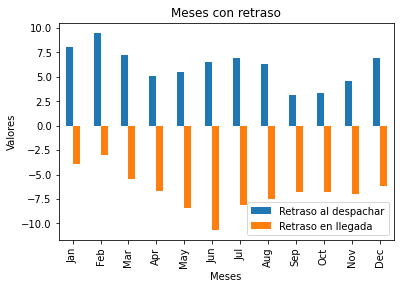

In [ ]:
df_g = flights_df.groupby('MONTH')[['DEPARTURE_DELAY','ARRIVAL_DELAY']].mean()
# df_m_m.columns['DEPARTURE_DELAY_AVG','DEPARTURE_DELAY_AVG','ARRIVAL_DELAY']
df_g.index = month
df_g.plot(kind='bar', legend=True, xlabel='Meses', ylabel='Valores',title ='Meses con retraso')
plt.legend(["Retraso al despachar", "Retraso en llegada"]);

In [ ]:
df_g.sort_values('DEPARTURE_DELAY',ascending=False)

,DEPARTURE_DELAY,ARRIVAL_DELAY
Feb,9.485788,-2.959841
Jan,8.040128,-3.879679
Mar,7.246086,-5.449751
Jul,6.921825,-8.134827
Dec,6.843943,-6.189813
Jun,6.482575,-10.695394
Aug,6.257712,-7.483570
May,5.458534,-8.448375
Apr,5.049615,-6.679483
Nov,4.593337,-6.995307


Top 10 de los aerolineas con salidas más demoradas

In [ ]:
airlines = flights_df.groupby('AIRLINE')[['DEPARTURE_DELAY']].mean()
# df_g.sort_values('DEPARTURE_DELAY',ascending=False)
airlines.sort_values('DEPARTURE_DELAY',ascending=False).head(10)


,DEPARTURE_DELAY
AIRLINE,
UA,9.512888
WN,8.324386
VX,7.108347
MQ,6.872760
AA,6.019538
OO,5.990113
EV,5.760513
DL,4.250177
US,4.082223


Aeronaves con más retraso

In [ ]:
df_t_n = flights_df.groupby('TAIL_NUMBER')[['DEPARTURE_DELAY']].mean()
df_t_n.sort_values('DEPARTURE_DELAY',ascending=False)[:10]

,DEPARTURE_DELAY
TAIL_NUMBER,
N844MQ,400.500000
N79011,242.000000
N121UA,208.000000
N843MH,188.000000
N128UA,182.666667
N37018,165.000000
N180UA,101.000000
N78004,100.600000
N177UA,92.363636


Motivos de cancelación

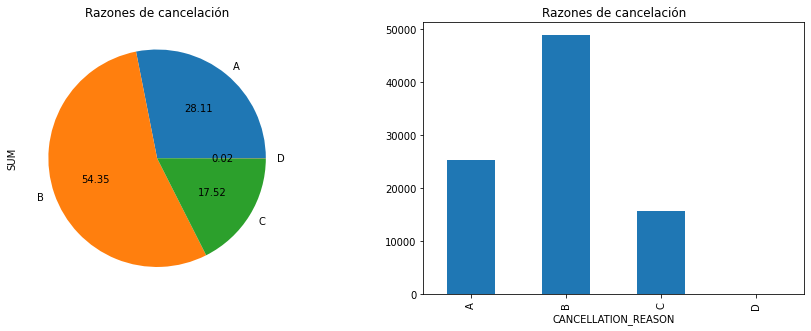

In [ ]:
df_can_reasons = flights_df[flights_df['CANCELLATION_REASON'] != 0].groupby('CANCELLATION_REASON')[['CANCELLATION_REASON']].count()
df_can_reasons.columns = ['SUM']
fig, axes = plt.subplots(1, 2, figsize=(15,5))
df_can_reasons['SUM'].plot.pie(ax=axes[0], autopct="%.2f", title='Razones de cancelación')
df_can_reasons['SUM'].plot(ax=axes[1], kind="bar", title='Razones de cancelación')
# plt.title = 'Razones de cancelación'

Cantidad de vuelos cancelados por aerolinea, solo y comparado con la cantidad de vuelos

In [ ]:
df_can_airline = flights_df[flights_df['CANCELLED'] == 1].groupby('AIRLINE').sum()[['CANCELLED']].sort_values(['CANCELLED'], ascending =False)
# df_sum_airline = flights_df.groupby('AIRLINE').sum()
df_can_airline.head(10)

,CANCELLED
AIRLINE,
WN,16043
EV,15231
MQ,15025
AA,10919
OO,9960
UA,6573
B6,4276
US,4067
DL,3824


In [ ]:
df_sum_airline = flights_df.groupby('AIRLINE')[['YEAR']].sum()
df_sum_airline.head(10)

,YEAR
AIRLINE,
AA,1462857760
AS,347629815
B6,538101720
DL,1764900215
EV,1152533655


In [ ]:
df_can_sum_airline = pd.merge(df_can_airline, df_sum_airline, on='AIRLINE')
df_can_sum_airline['PERCENT'] = (df_can_sum_airline['CANCELLED'] / df_can_sum_airline['YEAR'] )*100
df_can_sum_airline.sort_values('PERCENT', ascending=False).head(10)


,CANCELLED,YEAR,PERCENT
AIRLINE,,,
MQ,15025,593683480,0.002531
EV,15231,1152533655,0.001322
US,4067,400410725,0.001016
NK,2004,236518685,0.000847
OO,9960,1185531295,0.000840
B6,4276,538101720,0.000795
AA,10919,1462857760,0.000746
UA,6573,1039181845,0.000633
WN,16043,2542637825,0.000631


Suma de en minutos de los motivos de retraso

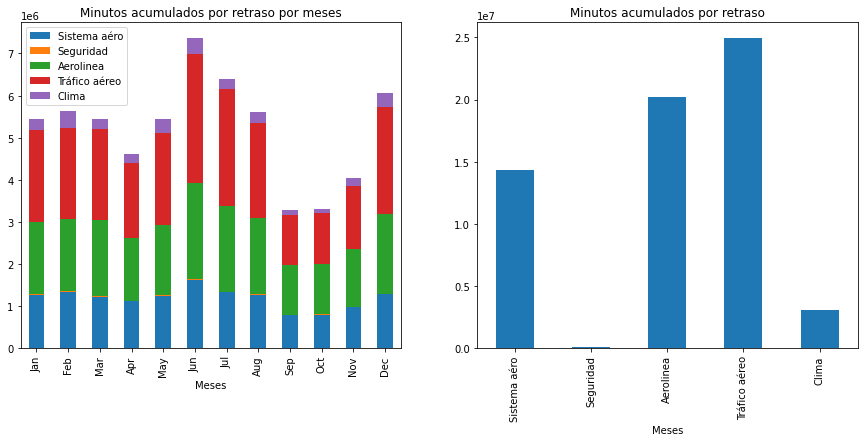

In [ ]:
# df_delay_reasons = flights_df[['MONTH','AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].groupby('MONTH').sum()
categories_delay = ["Sistema aéro", "Seguridad","Aerolinea","Tráfico aéreo","Clima"]
fig, axes = plt.subplots(1, 2, figsize=(15,5))
df_delay_reasons_all = flights_df[['MONTH','AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]
df_delay_reasons_month = df_delay_reasons_all.groupby('MONTH').sum()
df_delay_reasons_month.index = month
df_delay_reasons_month.plot(ax=axes[0], kind='bar',stacked=True, xlabel='Meses', title='Minutos acumulados por retraso por meses', figsize=(15, 6))
df_delay_reasons = df_delay_reasons_all[['AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].sum().to_frame()
df_delay_reasons.index = categories_delay
df_delay_reasons.plot(ax=axes[1], kind='bar',stacked=True, xlabel='Meses', legend=False,title='Minutos acumulados por retraso', figsize=(15, 6))
axes[0].legend(categories_delay)